### Context

DRS bank is facing challenging times. Their NPAs (Non-Performing Assets) has been on a rise recently and a large part of these are due to the loans given to individual customers(borrowers). Chief Risk Officer of the bank decides to put in a scientifically robust framework for approval of loans to individual customers to minimize the risk of loans converting into NPAs and initiates a project for the data science team at the bank. You, as a senior member of the team, are assigned this project.

### Objective
To identify the criteria to approve loans for an individual customer such that the likelihood of the loan delinquency is minimized

### Key questions to be answered
What are the factors that drive the behavior of loan delinquency?

### Dataset
* ID: Customer ID
* isDelinquent : indicates whether the customer is delinquent or not (1 => Yes, 0 => No)
* term: Loan term in months
* gender: Gender of the borrower
* age: Age of the borrower
* purpose: Purpose of Loan
* home_ownership: Status of borrower's home
* FICO: FICO (i.e. the bureau score) of the borrower

### Domain Information
* Transactor – A person who pays his due amount balance full and on time.
* Revolver – A person who pays the minimum due amount but keeps revolving his balance and does not pay the full amount.
* Delinquent - Delinquency means that you are behind on payments, a person who fails to pay even the minimum due amount.
* Defaulter – Once you are delinquent for a certain period your lender will declare you to be in the default stage.
* Risk Analytics – A wide domain in the financial and banking industry, basically analyzing the risk of the customer.


### Import the necessary packages

In [1]:
# this will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

# Library to suppress warnings or deprecation notes
import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data

import pandas as pd
import numpy as np

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# Libraries to build decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    plot_confusion_matrix,
    make_scorer,
)

<IPython.core.display.Javascript object>

### Read the dataset

In [2]:
data = pd.read_csv("Loan_Delinquent_Dataset.csv")

<IPython.core.display.Javascript object>

In [3]:
# copying data to another varaible to avoid any changes to original data
loan = data.copy()

<IPython.core.display.Javascript object>

### View the first and last 5 rows of the dataset.

In [4]:
loan.head()

,ID,isDelinquent,term,gender,purpose,home_ownership,age,FICO
0,1,1,36 months,Female,House,Mortgage,>25,300-500
1,2,0,36 months,Female,House,Rent,20-25,>500
2,3,1,36 months,Female,House,Rent,>25,300-500
3,4,1,36 months,Female,Car,Mortgage,>25,300-500
4,5,1,36 months,Female,House,Rent,>25,300-500


<IPython.core.display.Javascript object>

In [5]:
loan.tail()

,ID,isDelinquent,term,gender,purpose,home_ownership,age,FICO
11543,11544,0,60 months,Male,other,Mortgage,>25,300-500
11544,11545,1,36 months,Male,House,Rent,20-25,300-500
11545,11546,0,36 months,Female,Personal,Mortgage,20-25,>500
11546,11547,1,36 months,Female,House,Rent,20-25,300-500
11547,11548,1,36 months,Male,Personal,Mortgage,20-25,300-500


<IPython.core.display.Javascript object>

### Understand the shape of the dataset.

In [6]:
loan.shape

(11548, 8)

<IPython.core.display.Javascript object>

* The dataset has 11548 rows and 8 columns of data

### Check the data types of the columns for the dataset.

In [7]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11548 entries, 0 to 11547
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ID              11548 non-null  int64 
 1   isDelinquent    11548 non-null  int64 
 2   term            11548 non-null  object
 3   gender          11548 non-null  object
 4   purpose         11548 non-null  object
 5   home_ownership  11548 non-null  object
 6   age             11548 non-null  object
 7   FICO            11548 non-null  object
dtypes: int64(2), object(6)
memory usage: 721.9+ KB


<IPython.core.display.Javascript object>

**Observations -**
* isDelinquent is the dependent variable - type integer.
* All the dependent variables except for ID are object type.

### Summary of the dataset.

In [8]:
loan.describe(include="all")

,ID,isDelinquent,term,gender,purpose,home_ownership,age,FICO
count,11548.000000,11548.000000,11548,11548,11548,11548,11548,11548
unique,NaN,NaN,2,2,7,3,2,2
top,NaN,NaN,36 months,Male,House,Mortgage,20-25,300-500
freq,NaN,NaN,10589,6555,6892,5461,5888,6370
mean,5774.500000,0.668601,NaN,NaN,NaN,NaN,NaN,NaN
std,3333.764789,0.470737,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,2887.750000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,5774.500000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,8661.250000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN


<IPython.core.display.Javascript object>

**Observations-**   

* Most of the loans are for a 36-month term loan.
* More males have applied for loans than females.
* Most loan applications are for house loans.
* Most customers have either mortgaged their houses.
* Mostly customers in the age group 20-25 have applied for a loan.
* Most customers have a FICO score between 300 and 500.

In [9]:
# checking for unique values in ID column
loan["ID"].nunique()

11548

<IPython.core.display.Javascript object>

* Since all the values in ID column are unique we can drop it

In [10]:
loan.drop(["ID"], axis=1, inplace=True)

<IPython.core.display.Javascript object>

### Check for missing values

In [11]:
loan.isnull().sum()

isDelinquent      0
term              0
gender            0
purpose           0
home_ownership    0
age               0
FICO              0
dtype: int64

<IPython.core.display.Javascript object>

* There are no missing vaues in out dataset

### Univariate analysis

In [12]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

## Observations on isDelinquent

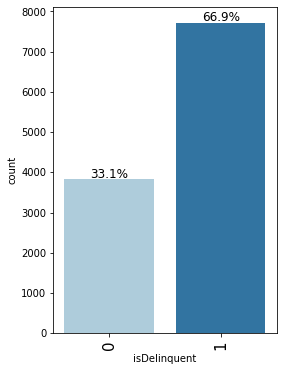

<IPython.core.display.Javascript object>

In [13]:
labeled_barplot(loan, "isDelinquent", perc=True)

* 66.9% of the customers are delinquent

## Observations on term

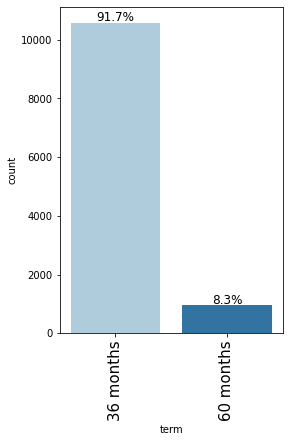

<IPython.core.display.Javascript object>

In [14]:
labeled_barplot(loan, "term", perc=True)

* 91.7% of the loans are for a 36 month term.

## Observations on gender

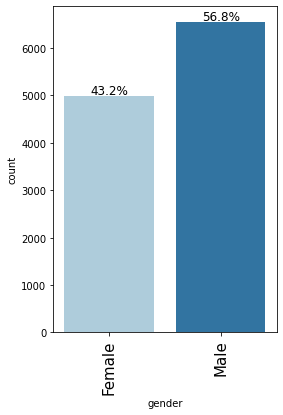

<IPython.core.display.Javascript object>

In [15]:
labeled_barplot(loan, "gender", perc=True)

* There are more male applicants (56.8%) than female applicants (43.2%)

## Observations on purpose

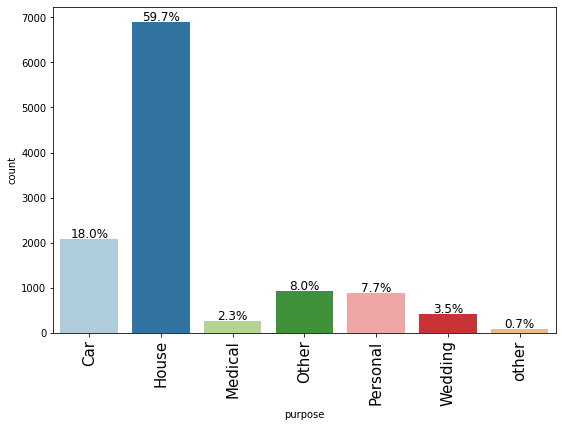

<IPython.core.display.Javascript object>

In [16]:
labeled_barplot(loan, "purpose", perc=True)

* Most loan applications are for house loans (59.7%) followed by car loans (18%)
* There are 2 levels named 'other' and 'Other' under the purpose variable. Since we do not have any other information about these, we can merge these levels.

## Observations on home_ownership

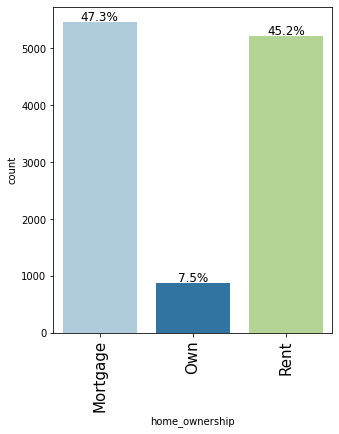

<IPython.core.display.Javascript object>

In [17]:
labeled_barplot(loan, "home_ownership", perc=True)

* Very few applicants <10% own their house, Most customers have either mortgaged their houses or live on rent. 

## Observations on age

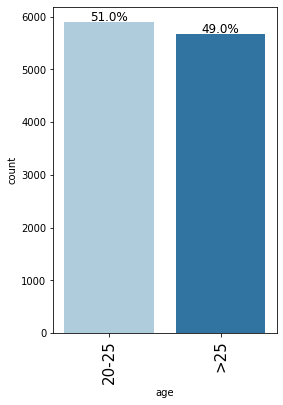

<IPython.core.display.Javascript object>

In [18]:
labeled_barplot(loan, "age", perc=True)

* Almost an equal percentage of people aged 20-25 and >25 have applied for the loan.

## Observations on FICO

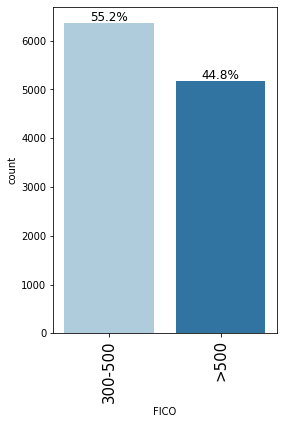

<IPython.core.display.Javascript object>

In [19]:
labeled_barplot(loan, "FICO", perc=True)

* Most customers have a FICO score between 300 and 500 (55.2%) followed by a score of greater than 500 (44.8%)

## Data Cleaning

In [20]:
loan["purpose"].unique()

array(['House', 'Car', 'Other', 'Personal', 'Wedding', 'Medical', 'other'],
      dtype=object)

<IPython.core.display.Javascript object>

### We can merge the purpose -  'other' and 'Other' together

In [21]:
loan["purpose"].replace("other", "Other", inplace=True)

<IPython.core.display.Javascript object>

In [22]:
loan["purpose"].unique()

array(['House', 'Car', 'Other', 'Personal', 'Wedding', 'Medical'],
      dtype=object)

<IPython.core.display.Javascript object>

## Bivariate Analysis

In [23]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 6))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

<IPython.core.display.Javascript object>

isDelinquent     0     1    All
term                           
All           3827  7721  11548
36 months     3168  7421  10589
60 months      659   300    959
------------------------------------------------------------------------------------------------------------------------


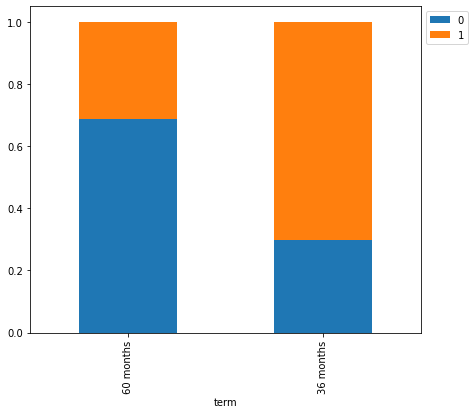

<IPython.core.display.Javascript object>

In [24]:
stacked_barplot(loan, "term", "isDelinquent")

* Most loan delinquent customers have taken loan for 36 months.

isDelinquent     0     1    All
gender                         
All           3827  7721  11548
Male          1977  4578   6555
Female        1850  3143   4993
------------------------------------------------------------------------------------------------------------------------


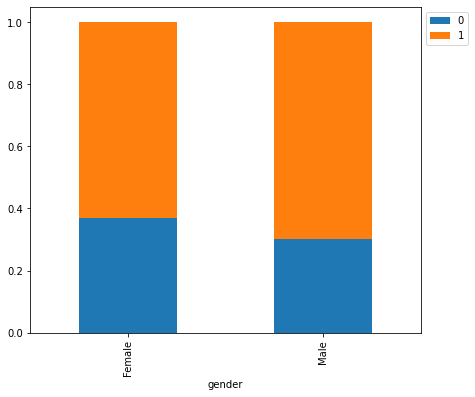

<IPython.core.display.Javascript object>

In [25]:
stacked_barplot(loan, "gender", "isDelinquent")

* There's not much difference between male and female customers.

isDelinquent     0     1    All
purpose                        
All           3827  7721  11548
House         2272  4620   6892
Car            678  1402   2080
Other          357   653   1010
Personal       274   618    892
Wedding        139   269    408
Medical        107   159    266
------------------------------------------------------------------------------------------------------------------------


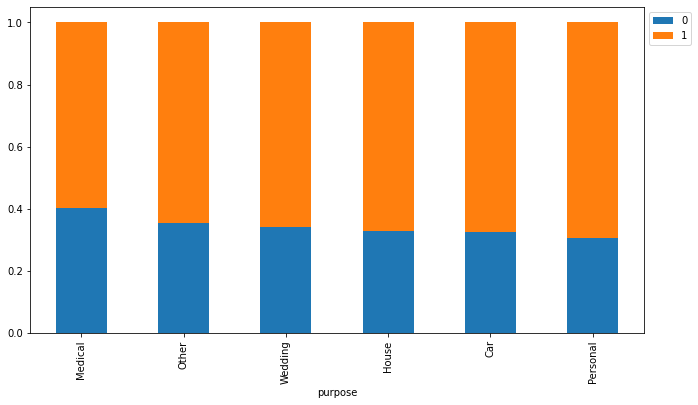

<IPython.core.display.Javascript object>

In [26]:
stacked_barplot(loan, "purpose", "isDelinquent")

* Most loan delinquent customers are those who have applied for house loans followed by car and personal loans.

isDelinquent       0     1    All
home_ownership                   
All             3827  7721  11548
Mortgage        1831  3630   5461
Rent            1737  3479   5216
Own              259   612    871
------------------------------------------------------------------------------------------------------------------------


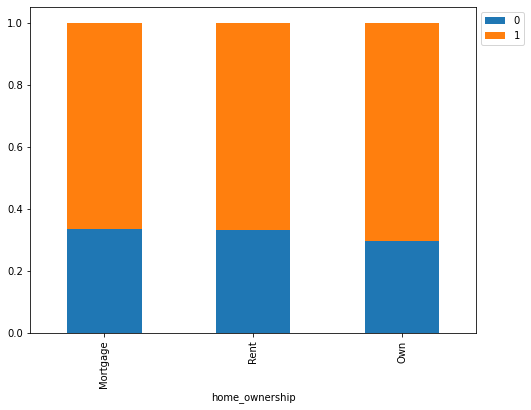

<IPython.core.display.Javascript object>

In [27]:
stacked_barplot(loan, "home_ownership", "isDelinquent")

* Those customers who have their own house are less delinquent than the ones who live in a rented place or have mortgaged their home.

isDelinquent     0     1    All
age                            
All           3827  7721  11548
>25           1969  3691   5660
20-25         1858  4030   5888
------------------------------------------------------------------------------------------------------------------------


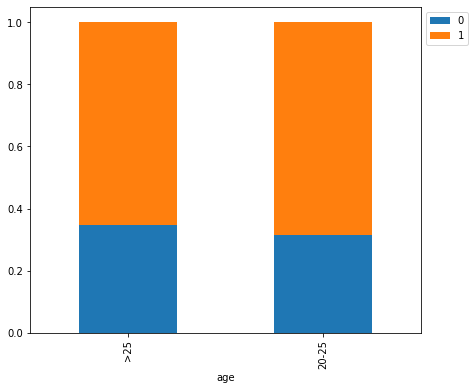

<IPython.core.display.Javascript object>

In [28]:
stacked_barplot(loan, "age", "isDelinquent")

* Customers between 20-25 years of age are more delinquent.

isDelinquent     0     1    All
FICO                           
All           3827  7721  11548
>500          2886  2292   5178
300-500        941  5429   6370
------------------------------------------------------------------------------------------------------------------------


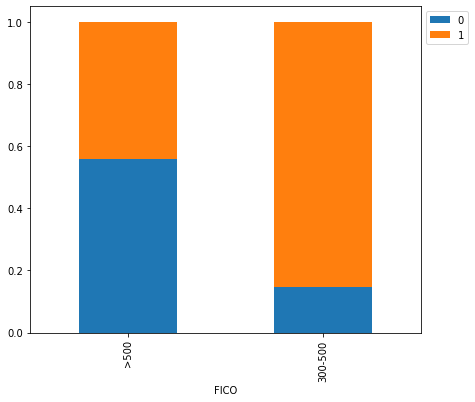

<IPython.core.display.Javascript object>

In [29]:
stacked_barplot(loan, "FICO", "isDelinquent")

* If FICO score is >500 the chances of delinquency decrease quite a lot compared to when FICO score is between 300-500.

### Key Observations - 
* FICO score and term of loan application appear to be very strong indicators of delinquency.

* Other factors appear to be not very good indicators of delinquency. (We can use chi-square tests to determine statistical significance in the association between two categorical variables).

### We observed that a high FICO score means that the chances of delinquency are lower, let us see  if any of the other variables indicate higher a FICO score.

FICO            300-500  >500    All
home_ownership                      
All                6370  5178  11548
Mortgage           2857  2604   5461
Rent               3033  2183   5216
Own                 480   391    871
------------------------------------------------------------------------------------------------------------------------


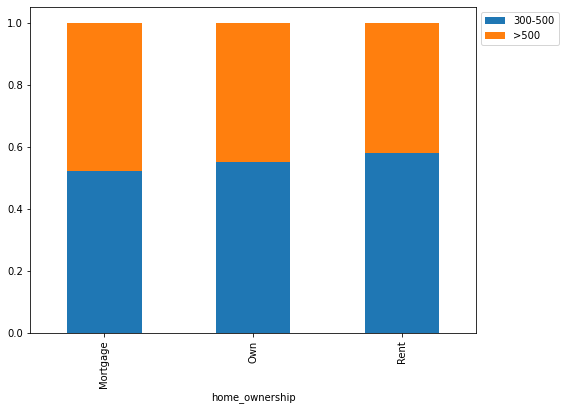

<IPython.core.display.Javascript object>

In [30]:
stacked_barplot(loan, "home_ownership", "FICO")

FICO   300-500  >500    All
age                        
All       6370  5178  11548
>25       2443  3217   5660
20-25     3927  1961   5888
------------------------------------------------------------------------------------------------------------------------


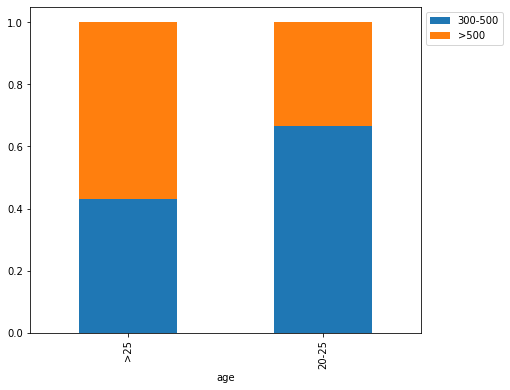

<IPython.core.display.Javascript object>

In [31]:
stacked_barplot(loan, "age", "FICO")

FICO    300-500  >500    All
gender                      
All        6370  5178  11548
Male       3705  2850   6555
Female     2665  2328   4993
------------------------------------------------------------------------------------------------------------------------


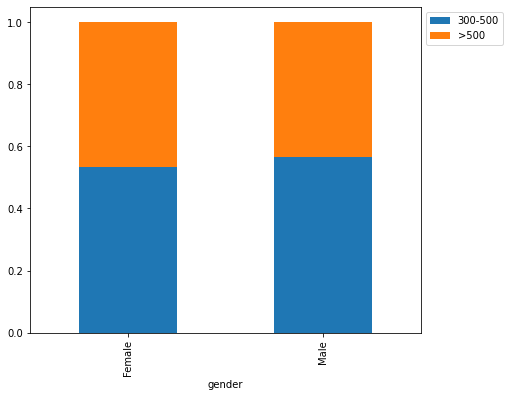

<IPython.core.display.Javascript object>

In [32]:
stacked_barplot(loan, "gender", "FICO")

## Key Observations

1. Home ownership and gender seem to have a slight impact on the FICO scores.
2. Age seems to have a much bigger impact on FICO scores.

## Model Building - Approach
1. Data preparation
2. Partition the data into train and test set.
3. Built a CART model on the train data.
4. Tune the model and prune the tree, if required.

## Split Data

In [33]:
X = loan.drop(["isDelinquent"], axis=1)
y = loan["isDelinquent"]

<IPython.core.display.Javascript object>

In [34]:
# encoding the categorical variables
X = pd.get_dummies(X, drop_first=True)
X.head()

,term_60 months,gender_Male,purpose_House,purpose_Medical,purpose_Other,purpose_Personal,purpose_Wedding,home_ownership_Own,home_ownership_Rent,age_>25,FICO_>500
0,0,0,1,0,0,0,0,0,0,1,0
1,0,0,1,0,0,0,0,0,1,0,1
2,0,0,1,0,0,0,0,0,1,1,0
3,0,0,0,0,0,0,0,0,0,1,0
4,0,0,1,0,0,0,0,0,1,1,0


<IPython.core.display.Javascript object>

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

<IPython.core.display.Javascript object>

In [36]:
print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in test data =", X_test.shape[0])

Number of rows in train data = 6928
Number of rows in test data = 4620


<IPython.core.display.Javascript object>

In [37]:
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Percentage of classes in training set:
1    0.677396
0    0.322604
Name: isDelinquent, dtype: float64
Percentage of classes in test set:
1    0.655411
0    0.344589
Name: isDelinquent, dtype: float64


<IPython.core.display.Javascript object>

## Build Decision Tree Model

### Model evaluation criterion

### Model can make wrong predictions as:
 
1. Predicting a customer will not be behind on payments (Non-Delinquent) but in reality the customer would be behind on payments.

2. Predicting a customer will be behind on payments (Delinquent) but in reality the customer would not be behind on payments (Non-Delinquent). 


### Which case is more important? 

* If we predict a non-delinquent customer as a delinquent customer bank would lose an opportunity of providing loan to a potential customer.

### How to reduce this loss i.e need to reduce False Negatives?
*  `recall` should be maximized, the greater the recall higher the chances of minimizing the false negatives.

#### First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.
* The model_performance_classification_sklearn function will be used to check the model performance of models. 
* The make_confusion_matrix function will be used to plot confusion matrix.

In [38]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [39]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

## Build Decision Tree Model

In [40]:
model = DecisionTreeClassifier(criterion="gini", random_state=1)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

<IPython.core.display.Javascript object>

#### Checking model performance on training set

In [41]:
decision_tree_perf_train = model_performance_classification_sklearn(
    model, X_train, y_train
)
decision_tree_perf_train

,Accuracy,Recall,Precision,F1
0,0.855514,0.9088,0.881563,0.894974


<IPython.core.display.Javascript object>

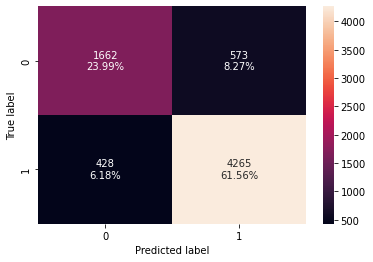

<IPython.core.display.Javascript object>

In [42]:
confusion_matrix_sklearn(model, X_train, y_train)

#### Checking model performance on test set

In [43]:
decision_tree_perf_test = model_performance_classification_sklearn(
    model, X_test, y_test
)
decision_tree_perf_test

,Accuracy,Recall,Precision,F1
0,0.843723,0.897292,0.868606,0.882716


<IPython.core.display.Javascript object>

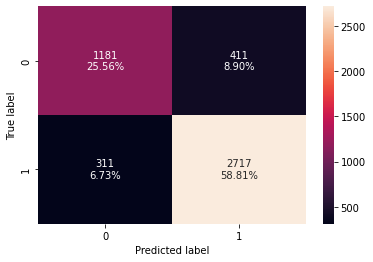

<IPython.core.display.Javascript object>

In [44]:
confusion_matrix_sklearn(model, X_test, y_test)

* Model is giving good and generalized results on training and test set.

## Visualizing the Decision Tree

In [45]:
column_names = list(X.columns)
feature_names = column_names
print(feature_names)

['term_60 months', 'gender_Male', 'purpose_House', 'purpose_Medical', 'purpose_Other', 'purpose_Personal', 'purpose_Wedding', 'home_ownership_Own', 'home_ownership_Rent', 'age_>25', 'FICO_>500']


<IPython.core.display.Javascript object>

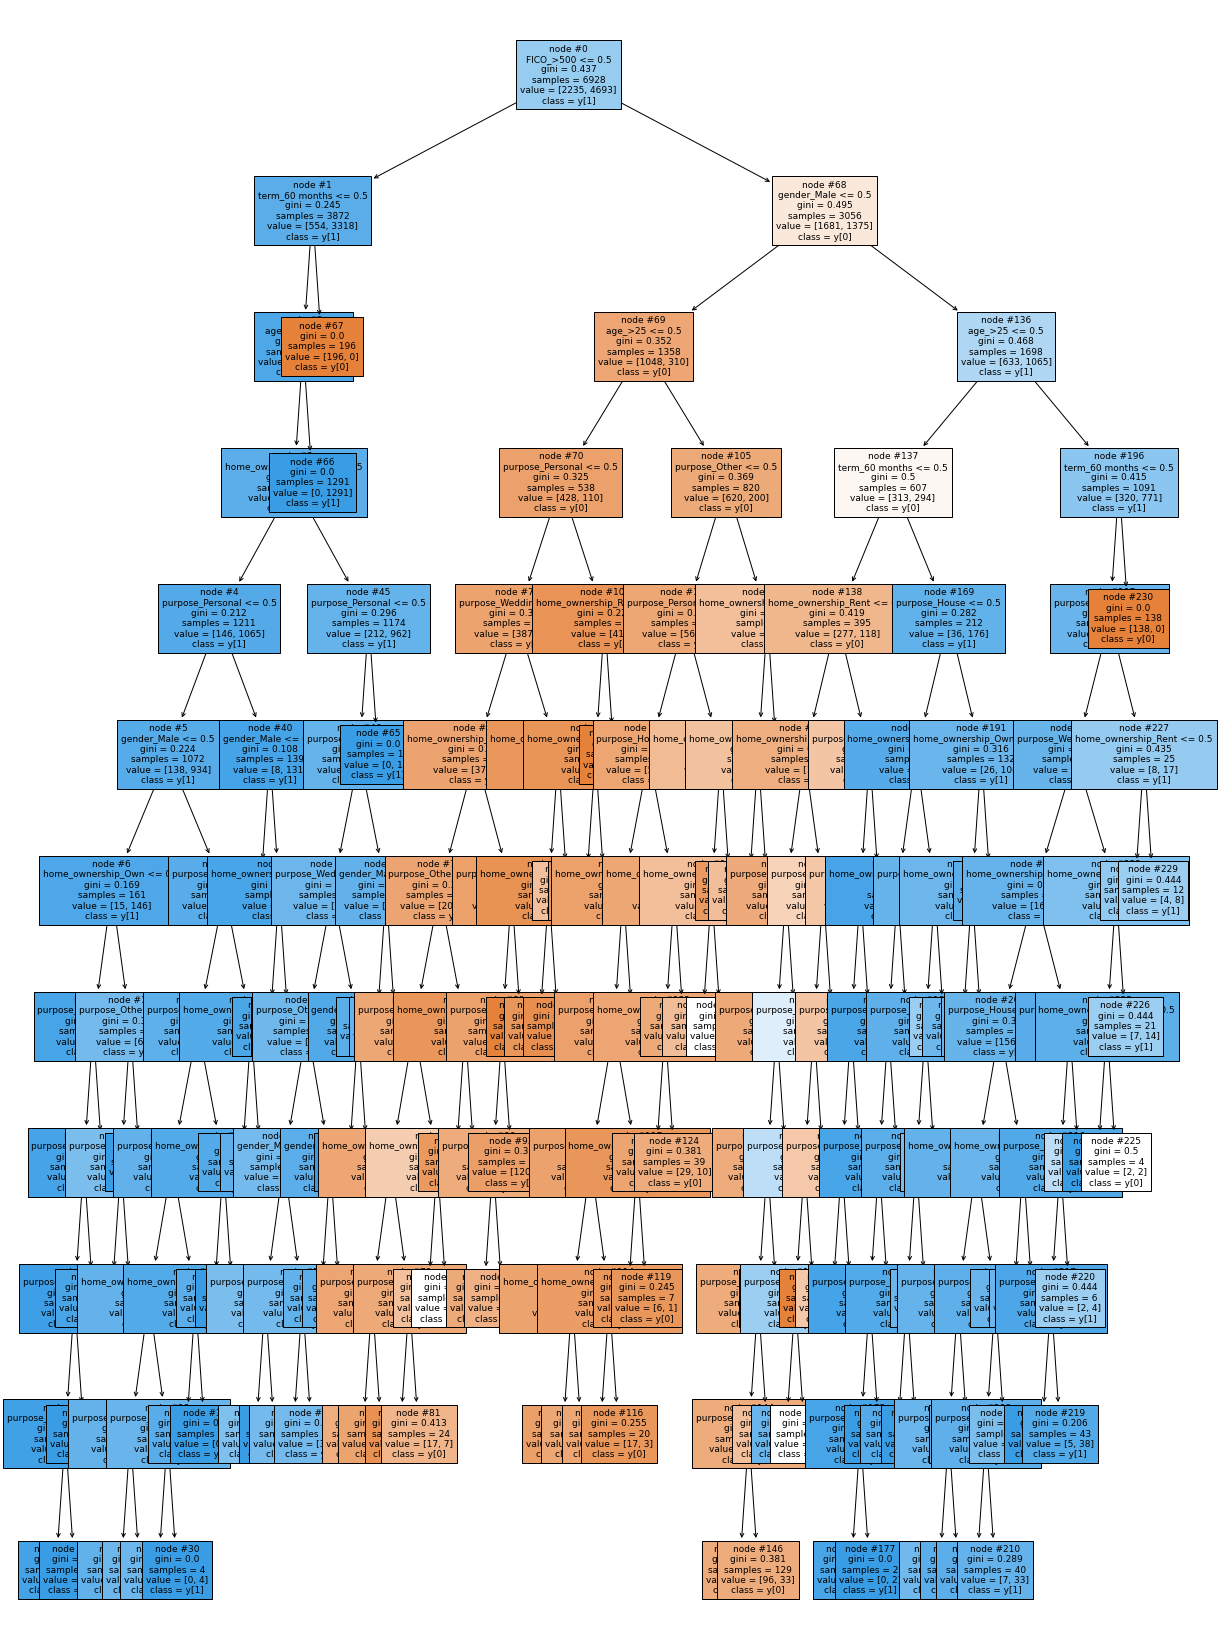

<IPython.core.display.Javascript object>

In [46]:
plt.figure(figsize=(20, 30))

out = tree.plot_tree(
    model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [47]:
# Text report showing the rules of a decision tree -

print(tree.export_text(model, feature_names=feature_names, show_weights=True))

|--- FICO_>500 <= 0.50
|   |--- term_60 months <= 0.50
|   |   |--- age_>25 <= 0.50
|   |   |   |--- home_ownership_Rent <= 0.50
|   |   |   |   |--- purpose_Personal <= 0.50
|   |   |   |   |   |--- gender_Male <= 0.50
|   |   |   |   |   |   |--- home_ownership_Own <= 0.50
|   |   |   |   |   |   |   |--- purpose_Medical <= 0.50
|   |   |   |   |   |   |   |   |--- purpose_House <= 0.50
|   |   |   |   |   |   |   |   |   |--- purpose_Other <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- purpose_Wedding <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- weights: [1.00, 18.00] class: 1
|   |   |   |   |   |   |   |   |   |   |--- purpose_Wedding >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- weights: [0.00, 9.00] class: 1
|   |   |   |   |   |   |   |   |   |--- purpose_Other >  0.50
|   |   |   |   |   |   |   |   |   |   |--- weights: [0.00, 14.00] class: 1
|   |   |   |   |   |   |   |   |--- purpose_House >  0.50
|   |   |   |   |   |   |   |   |   |--- weight

<IPython.core.display.Javascript object>

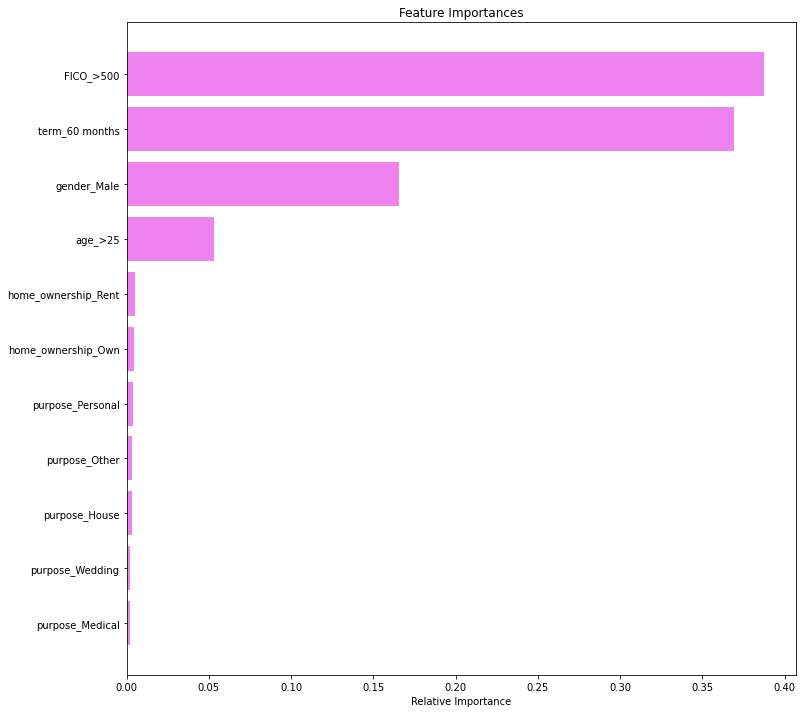

<IPython.core.display.Javascript object>

In [48]:
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* FICO score, duration of loan and gender are the top 3 important features.

### Using GridSearch for Hyperparameter tuning of our tree model 
* Let's see if we can improve our model performance even more.

In [49]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from

parameters = {
    "max_depth": [np.arange(2, 50, 5), None],
    "criterion": ["entropy", "gini"],
    "splitter": ["best", "random"],
    "min_impurity_decrease": [0.000001, 0.00001, 0.0001],
}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(min_impurity_decrease=0.0001, random_state=1)

<IPython.core.display.Javascript object>

#### Checking performance on training set

In [50]:
decision_tree_tune_perf_train = model_performance_classification_sklearn(
    estimator, X_train, y_train
)
decision_tree_tune_perf_train

,Accuracy,Recall,Precision,F1
0,0.855225,0.910079,0.880256,0.894919


<IPython.core.display.Javascript object>

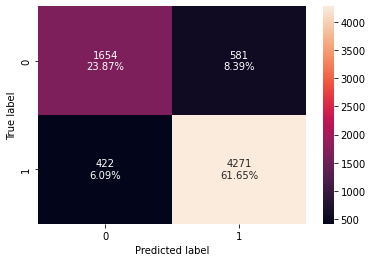

<IPython.core.display.Javascript object>

In [51]:
confusion_matrix_sklearn(estimator, X_train, y_train)

* The Recall has improved on the training set as compared to the initial model.

#### Checking model performance on test set

In [52]:
decision_tree_tune_perf_test = model_performance_classification_sklearn(
    estimator, X_test, y_test
)

decision_tree_tune_perf_test

,Accuracy,Recall,Precision,F1
0,0.843939,0.898613,0.867943,0.883012


<IPython.core.display.Javascript object>

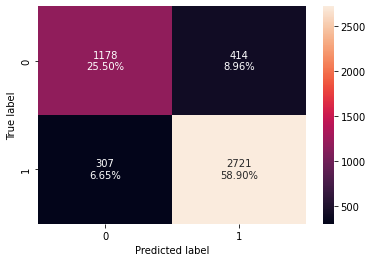

<IPython.core.display.Javascript object>

In [53]:
confusion_matrix_sklearn(estimator, X_test, y_test)

* After hyperparameter tuning the model has performance has remained same and the model has become simpler.

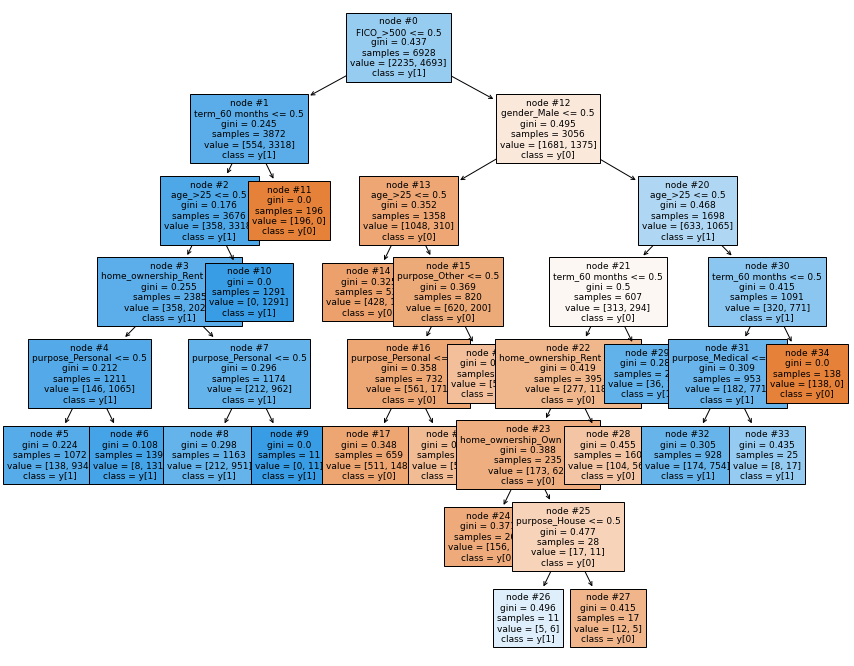

<IPython.core.display.Javascript object>

In [54]:
plt.figure(figsize=(15, 12))

tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
plt.show()

* We are getting a simplified tree after pre-pruning.

## Cost Complexity Pruning

In [55]:
clf = DecisionTreeClassifier(random_state=1)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

<IPython.core.display.Javascript object>

In [56]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.000000e+00,0.226403
1,0.000000e+00,0.226403
2,2.794668e-09,0.226403
3,2.244984e-07,0.226403
4,4.918264e-07,0.226404
5,6.998390e-07,0.226404
6,7.597561e-07,0.226405
7,1.058874e-06,0.226406
8,1.184343e-06,0.226407
9,1.386119e-06,0.226409


<IPython.core.display.Javascript object>

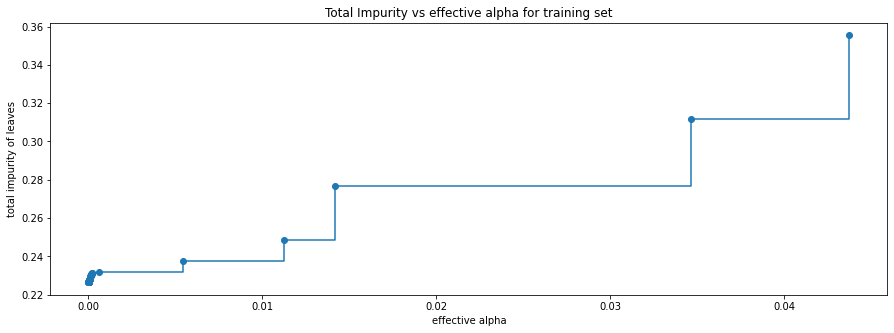

<IPython.core.display.Javascript object>

In [57]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

Next, we train a decision tree using the effective alphas. The last value
in ``ccp_alphas`` is the alpha value that prunes the whole tree,
leaving the tree, ``clfs[-1]``, with one node.

In [1]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

NameError: name 'ccp_alphas' is not defined


For the remainder, we remove the last element in
``clfs`` and ``ccp_alphas``, because it is the trivial tree with only one
node. Here we show that the number of nodes and tree depth decreases as alpha
increases.

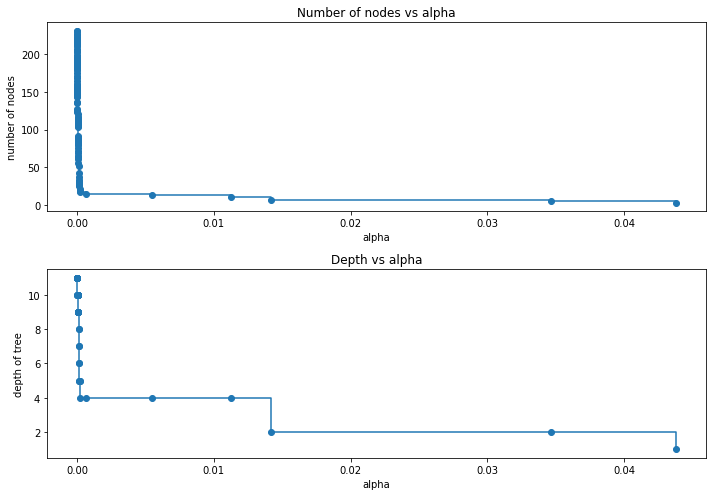

<IPython.core.display.Javascript object>

In [59]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

Recall vs alpha for training and testing sets
----------------------------------------------------

In [60]:
recall_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = recall_score(y_train, pred_train)
    recall_train.append(values_train)

<IPython.core.display.Javascript object>

In [61]:
recall_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = recall_score(y_test, pred_test)
    recall_test.append(values_test)

<IPython.core.display.Javascript object>

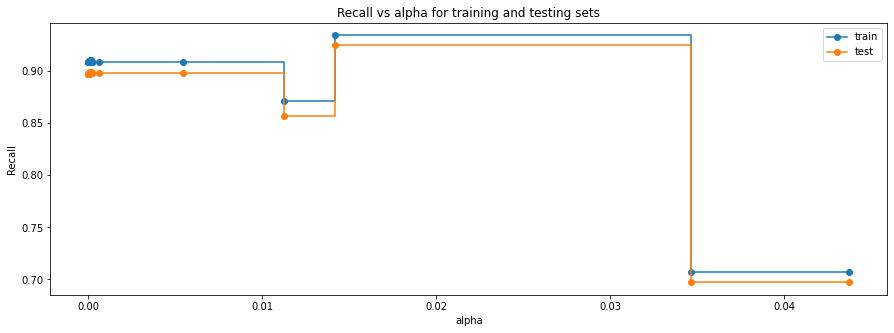

<IPython.core.display.Javascript object>

In [62]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [63]:
# creating the model where we get highest train and test recall
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.014171370928955346, random_state=1)


<IPython.core.display.Javascript object>

#### Checking model performance on training set

In [64]:
decision_tree_postpruned_perf_train = model_performance_classification_sklearn(
    best_model, X_train, y_train
)
decision_tree_postpruned_perf_train

,Accuracy,Recall,Precision,F1
0,0.812211,0.933944,0.815594,0.870766


<IPython.core.display.Javascript object>

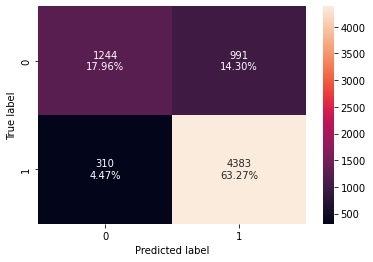

<IPython.core.display.Javascript object>

In [65]:
confusion_matrix_sklearn(best_model, X_train, y_train)

#### Checking model performance on test set

In [66]:
decision_tree_postpruned_perf_test = model_performance_classification_sklearn(
    best_model, X_test, y_test
)
decision_tree_postpruned_perf_test

,Accuracy,Recall,Precision,F1
0,0.798052,0.924703,0.798859,0.857187


<IPython.core.display.Javascript object>

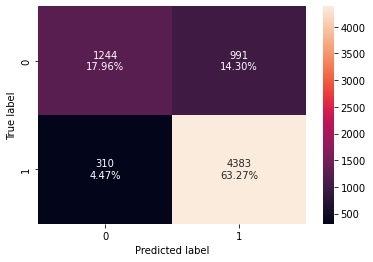

<IPython.core.display.Javascript object>

In [67]:
confusion_matrix_sklearn(best_model, X_train, y_train)

* With post-pruning we are getting good and generalized model performance on both training and test set.
* The recall has improved further.

## Visualizing the Decision Tree

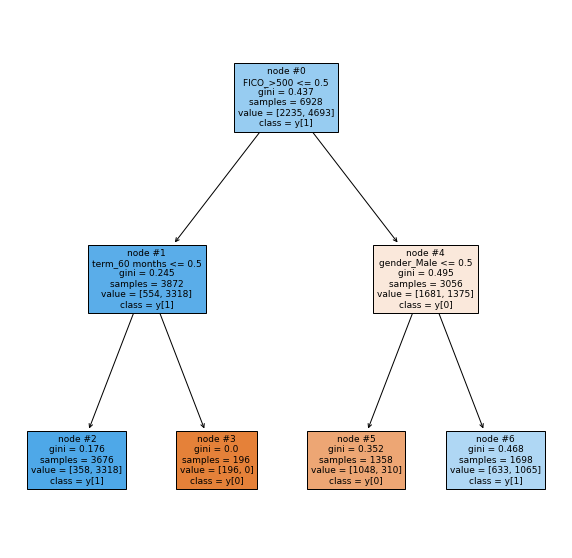

<IPython.core.display.Javascript object>

In [68]:
plt.figure(figsize=(10, 10))

out = tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()
plt.show()

In [69]:
# Text report showing the rules of a decision tree -

print(tree.export_text(best_model, feature_names=feature_names, show_weights=True))

|--- FICO_>500 <= 0.50
|   |--- term_60 months <= 0.50
|   |   |--- weights: [358.00, 3318.00] class: 1
|   |--- term_60 months >  0.50
|   |   |--- weights: [196.00, 0.00] class: 0
|--- FICO_>500 >  0.50
|   |--- gender_Male <= 0.50
|   |   |--- weights: [1048.00, 310.00] class: 0
|   |--- gender_Male >  0.50
|   |   |--- weights: [633.00, 1065.00] class: 1



<IPython.core.display.Javascript object>

In [70]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the 'criterion' brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        best_model.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                          Imp
FICO_>500            0.510119
term_60 months       0.273355
gender_Male          0.216526
purpose_House        0.000000
purpose_Medical      0.000000
purpose_Other        0.000000
purpose_Personal     0.000000
purpose_Wedding      0.000000
home_ownership_Own   0.000000
home_ownership_Rent  0.000000
age_>25              0.000000


<IPython.core.display.Javascript object>

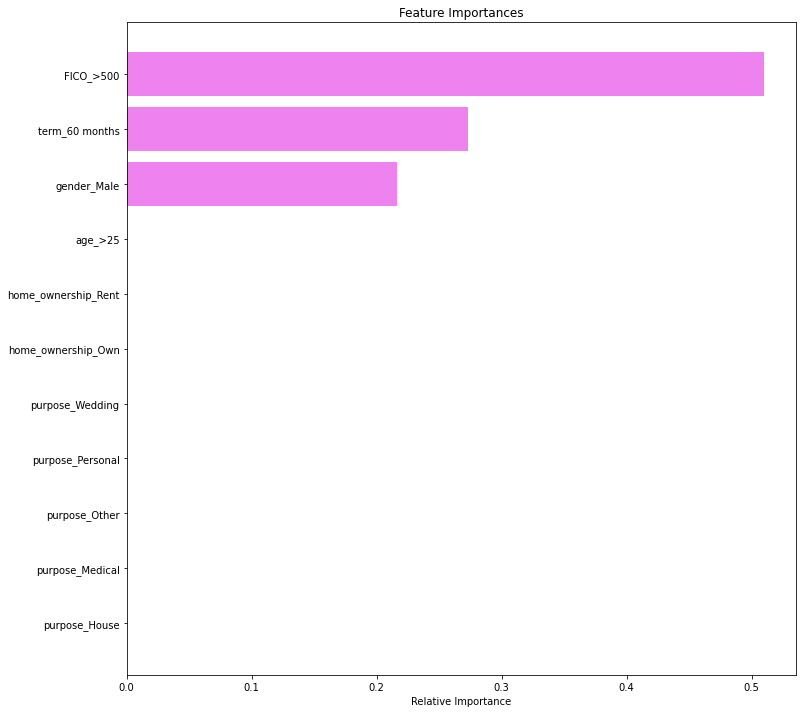

<IPython.core.display.Javascript object>

In [71]:
importances = best_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* FICO score, duration of the loan, and gender remain the most important feature with post-pruning too.

## Comparing all the decision tree models

In [72]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_train.T,
        decision_tree_tune_perf_train.T,
        decision_tree_postpruned_perf_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree sklearn,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.855514,0.855225,0.812211
Recall,0.908800,0.910079,0.933944
Precision,0.881563,0.880256,0.815594
F1,0.894974,0.894919,0.870766


<IPython.core.display.Javascript object>

In [73]:
# test performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_test.T,
        decision_tree_tune_perf_test.T,
        decision_tree_postpruned_perf_test.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Test set performance comparison:")
models_train_comp_df

Test set performance comparison:


,Decision Tree sklearn,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.843723,0.843939,0.798052
Recall,0.897292,0.898613,0.924703
Precision,0.868606,0.867943,0.798859
F1,0.882716,0.883012,0.857187


<IPython.core.display.Javascript object>

* Decision tree with post-pruning is giving the highest recall on the test set.
* The tree with post pruning is not complex and easy to interpret.

## Business Insights

* FICO, term and gender (in that order) are the most important variables in determining if a borrower will get into a delinquent stage 
* No borrower shall be given a loan if they are applying for a 36 month term loan and 
have a FICO score in the range 300-500.
* Female borrowers with a FICO score greater than 500 should be our target customers.
* Criteria to approve loan according to decision tree model should depend on three main factors - FICO score, duration of loan and gender that is - If the FICO score is less than 500 and the duration of loan is less than 60 months then the customer will not be able to repay the loans. If the customer has greater than 500 FICO score and is a female higher chances that they will repay the loans.